In [2]:
%matplotlib inline
%load_ext rpy2.ipython

In [22]:
%%R
library(dplyr)
library(fdrtool)
library(ggplot2)
library(igraph)


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:igraph’:

    %>%, as_data_frame, groups, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [9]:
%%R
co_occur_pairs<-function(dataset){
 #dataset<-data
	
	#head(dataset)
	final.results<-data.frame()
	rhos<-c(-.75,-.5,.5,.75)
	trts<-as.vector(unique(dataset$trt))
	#trts
for(t in 1:length(trts)){
	#t<-1
	dataset_trt<-subset(dataset, trt==trts[t])
	dataset_trt_no0<-subset(dataset_trt, ab1 > 0 & ab2 > 0)
	
	dataset_trt_no0$pairs<-paste(dataset_trt_no0$taxa1,dataset_trt_no0$taxa2)
	
for(r in 1:4){
	#r<-5
	if(rhos[r] < 0){temp<-subset(dataset_trt_no0, rho <= rhos[r])}
	if(rhos[r] > 0){temp<-subset(dataset_trt_no0, rho >= rhos[r])}
	if(dim(temp)[1]>1){
	
	temp.graph<-simplify(graph.edgelist(as.matrix(temp[,c(2,3)]),directed=FALSE))
	edge_list<-data.frame(get.edgelist(temp.graph,names=TRUE))
	
	edge_list$pairs<-paste(edge_list$X1,edge_list$X2)
	edge_list_pvals<-merge(edge_list,dataset_trt_no0,by="pairs",sort=FALSE  )
	
	edge_list_pvals$rho_cut<-rhos[r]
	edge_list_pvals$trt<-trts[t]
	
	edge_list_pvals$qval<-fdrtool(edge_list_pvals$p.value, statistic="pvalue",plot=FALSE,verbose=FALSE)$qval
	as.matrix(names(edge_list_pvals))
	
	final.results<-rbind(final.results,edge_list_pvals[,-c(2:3)])	}
}
	print(t/length(trts))
}
	return(final.results)
}

results<-read.table('data/Spearmans.txt', sep = '\t', header = TRUE)
edge_lists<-co_occur_pairs(results)


[1] 0.25
[1] 0.5
[1] 0.75
[1] 1


In [20]:
%%R
head(edge_lists)

                             pairs trt       taxa1                taxa2
1  __0319-6A21 __Bradyrhizobiaceae NTH __0319-6A21  __Bradyrhizobiaceae
2   __0319-6A21 __Caulobacteraceae NTH __0319-6A21   __Caulobacteraceae
3      __0319-6A21 __Cytophagaceae NTH __0319-6A21      __Cytophagaceae
4 __0319-6A21 __Erythrobacteraceae NTH __0319-6A21 __Erythrobacteraceae
5        __0319-6A21 __Marmoricola NTH __0319-6A21        __Marmoricola
6  __0319-6A21 __Sphingomonadaceae NTH __0319-6A21  __Sphingomonadaceae
         rho      p.value  ab1  ab2 rho_cut         qval
1 -0.5528465 9.959741e-05 8887 1564    -0.5 3.668596e-06
2 -0.5399516 1.550481e-04 8887  290    -0.5 4.633177e-06
3 -0.5474394 1.201721e-04 8887 1408    -0.5 4.074708e-06
4 -0.5138864 3.598183e-04 8887  441    -0.5 6.336047e-06
5 -0.5588257 8.061439e-05 8887  801    -0.5 3.226333e-06
6 -0.5625749 7.045722e-05 8887 2354    -0.5 3.120300e-06


In [10]:
%%R
results<-read.table('data/Spearmans.txt', sep = '\t', header = TRUE)
head(results)

  trt       taxa1              taxa2         rho     p.value  ab1  ab2
1 NTH __0319-6A21        __0319-6G20 -0.28867376 0.057380872 8887  424
2 NTH __0319-6A21         __0319-6M6  0.28868995 0.057366271 8887 1335
3 NTH __0319-6A21            __288-2  0.08726187 0.573269812 8887 1262
4 NTH __0319-6A21            __480-2 -0.19474522 0.205235881 8887 2470
5 NTH __0319-6A21            __A0839  0.04370233 0.778190730 8887  127
6 NTH __0319-6A21 __Acetobacteraceae -0.41352761 0.005268205 8887  296


In [68]:
%%R
results2 = results %>% select(taxa1, taxa2, rho, p.value, ab1, ab2, trt) %>%
            filter(p.value <= 0.01, rho > 0.7)

In [69]:
%%R
head(results2)

                  taxa1              taxa2       rho      p.value   ab1  ab2
1   __Acidimicrobiaceae        __Iamiaceae 0.7641417 1.587282e-09 12011 1825
2   __Acidimicrobiaceae   __Pseudonocardia 0.7858528 2.631402e-10 12011 2844
3      __Alcaligenaceae __Desulfobulbaceae 0.7094032 7.021156e-08  1462   79
4     __Anaerolineaceae   __Caldilineaceae 0.7885885 2.067682e-10  7428 2344
5 __Desulfuromonadaceae   __Rhodocyclaceae 0.7006955 1.185830e-07   278  773
6           __Iamiaceae   __Pseudonocardia 0.7239956 2.792101e-08  1825 2844
  trt
1 NTH
2 NTH
3 NTH
4 NTH
5 NTH
6 NTH


In [70]:
%%R
network<-graph.data.frame(results2, directed=F) 

V(network) #prints the list of vertices (people)
E(network) #prints the list of edges (relationships)
#degree(network) #print the number of edges per vertex (relationships per people)

# First try. We can plot the graph right away but the results will usually be unsatisfactory:


+ 65/65 edges (vertex names):
 [1] __Acidimicrobiaceae  --__Iamiaceae                    
 [2] __Acidimicrobiaceae  --__Pseudonocardia               
 [3] __Alcaligenaceae     --__Desulfobulbaceae             
 [4] __Anaerolineaceae    --__Caldilineaceae               
 [5] __Desulfuromonadaceae--__Rhodocyclaceae               
 [6] __Iamiaceae          --__Pseudonocardia               
 [7] __Nitrospiraceae     --__uncultured_deep-sea_bacterium
 [8] __Sphingomonadaceae  --__Xanthomonadaceae             
 [9] __Acidimicrobiaceae  --__Iamiaceae                    
[10] __Actinocorallia     --__uncultured_cyanobacterium    
+ ... omitted several edges


In [71]:
%%R
network <- simplify(network, remove.multiple = F, remove.loops = T) 


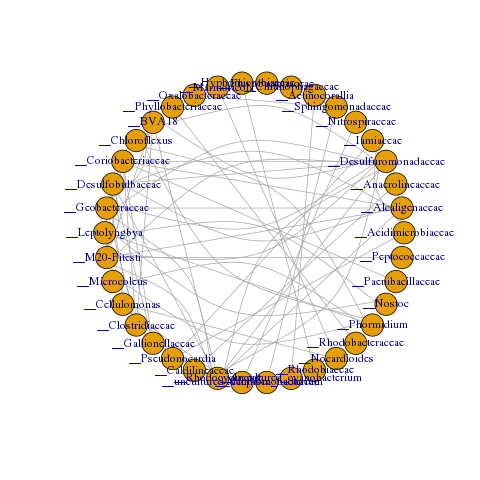

In [81]:
%%R
l <- layout.circle(network)
plot(network, layout=l)

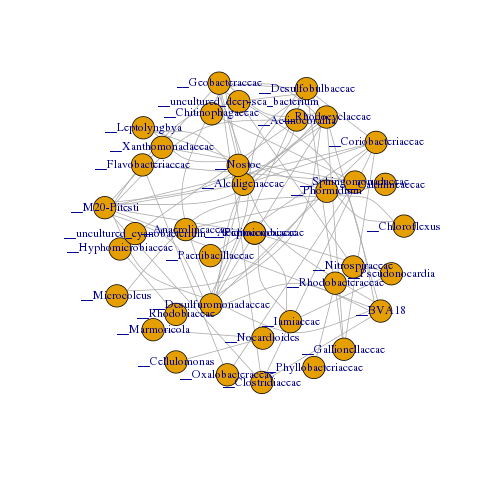

In [73]:
%%R
l <- layout.sphere(network)
plot(network, layout=l)